In [2]:
import joblib
from utils import *

In [3]:
dataset =  pd.read_csv('..\euthyroid_sick_syndrome\datasets\euthyroid\euthyroid_final_features.csv')
output_label_dataset = dataset['classification']  #1 = sick, 0 = normal
dataset = dataset[['age', 'sex', 'sick', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']]
dataset_res, ouput_label = balance_dataset_smote(dataset, output_label_dataset, random_state=42, k_neighbors=5)
input_train, input_test, output_train, output_test = slipt_and_standardize_dataset(dataset=dataset_res, output_label=ouput_label)                                   

In [4]:
model_decision_tree = joblib.load('..\euthyroid_sick_syndrome\models_file\DecisionTreeClassifier.sav')

model_random_forest = joblib.load('..\euthyroid_sick_syndrome\models_file\RandomForestClassifier.sav')

In [5]:
output_model_decision = model_decision_tree.predict(input_test)

output_model_random = model_random_forest.predict(input_test)

In [21]:
accuracy(output_test, output_model_decision)


A acurácia é de:  0.9817073170731707


In [6]:
accuracy(output_test, output_model_random)


A acurácia é de:  0.9834494773519163


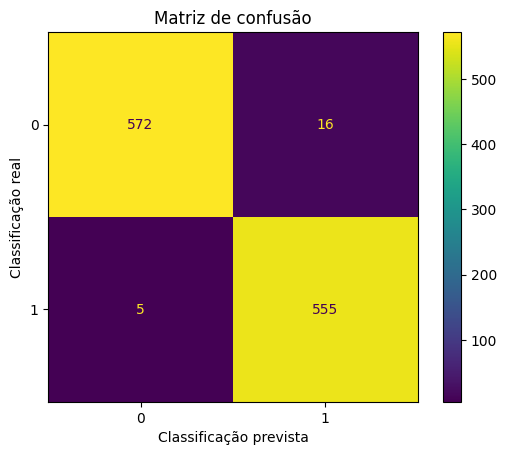

In [15]:
plot_confusion_matrix(output_test, output_model_decision, model_decision_tree)

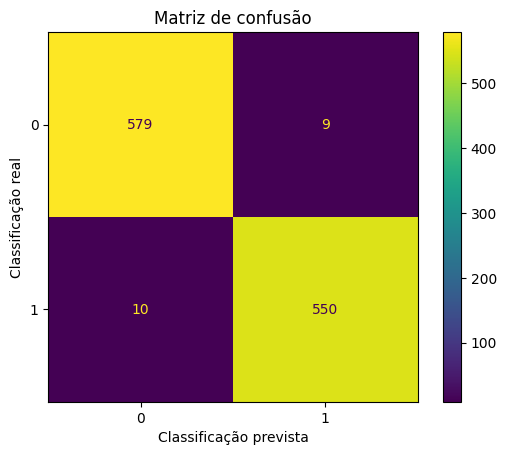

In [8]:
plot_confusion_matrix(output_test, output_model_random, model_random_forest)

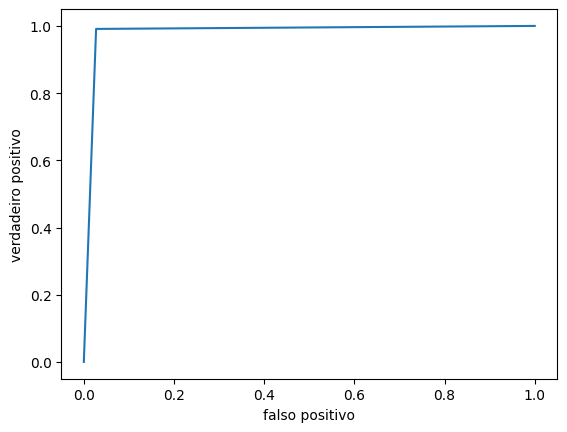

In [22]:
 roc(output_test, output_model_decision) #plotando a curva ROC

e:\My Drive\projects\thyroi-disease\euthyroid\euthyroid_sick_syndrome\cilab\lib\site-packages\mlxtend\plotting\learning_curves.py:114: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  model = clf.fit(X_train[:r], y_train[:r])
e:\My Drive\projects\thyroi-disease\euthyroid\euthyroid_sick_syndrome\cilab\lib\site-packages\mlxtend\plotting\learning_curves.py:119: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  train_misclf = scoring_func[scoring](y_train[:r], y_train_predict)
e:\My Drive\p

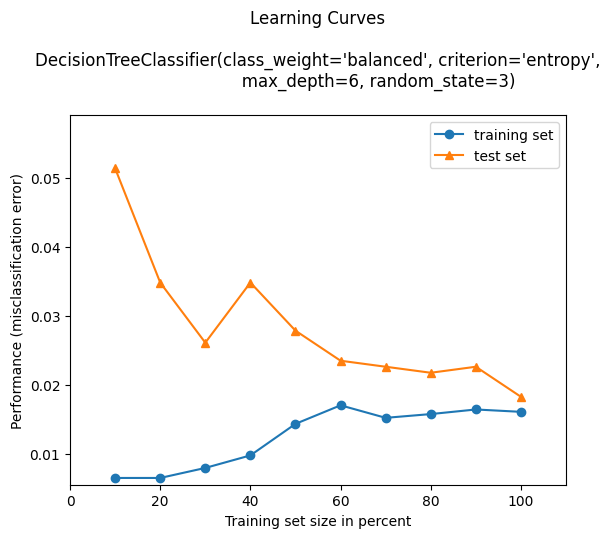

In [16]:
miss_classification(input_train, output_train, input_test, output_test, model_decision_tree)

e:\My Drive\projects\thyroi-disease\euthyroid\euthyroid_sick_syndrome\cilab\lib\site-packages\mlxtend\plotting\learning_curves.py:114: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  model = clf.fit(X_train[:r], y_train[:r])
e:\My Drive\projects\thyroi-disease\euthyroid\euthyroid_sick_syndrome\cilab\lib\site-packages\mlxtend\plotting\learning_curves.py:119: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  train_misclf = scoring_func[scoring](y_train[:r], y_train_predict)
e:\My Drive\p

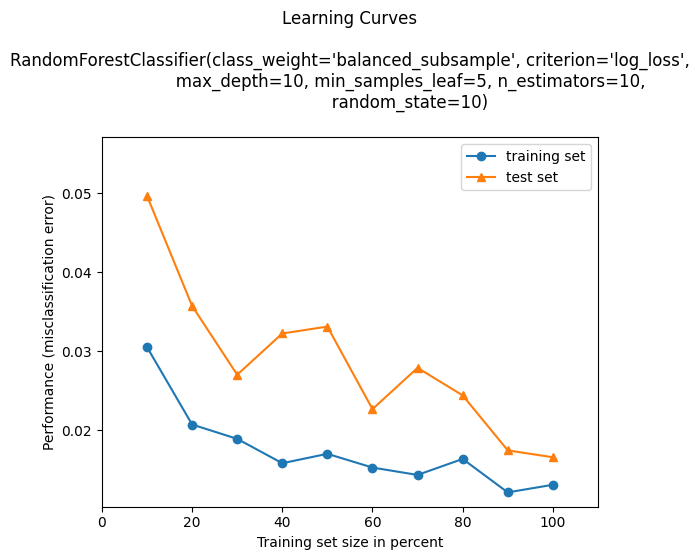

In [9]:
miss_classification(input_train, output_train, input_test, output_test, model_random_forest)